<a href="https://colab.research.google.com/github/gopalaniyengar/ITSP_BigBrainTeam_CNN/blob/Gopalan/ITSP_Proj_MK2_Part_2_train2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
/pwd


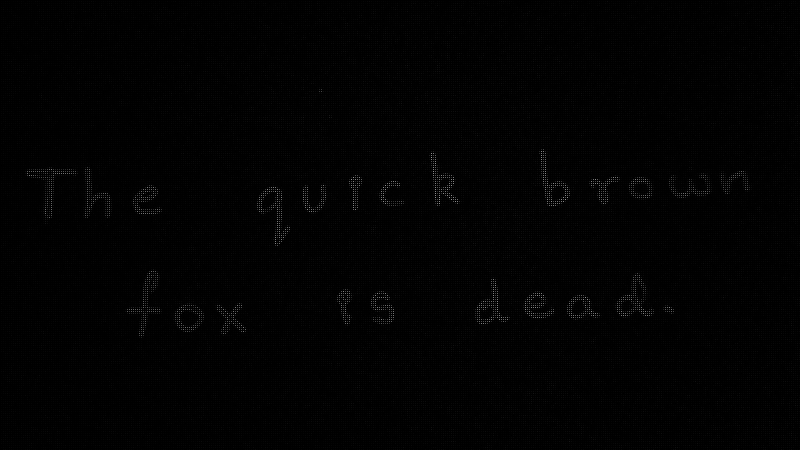

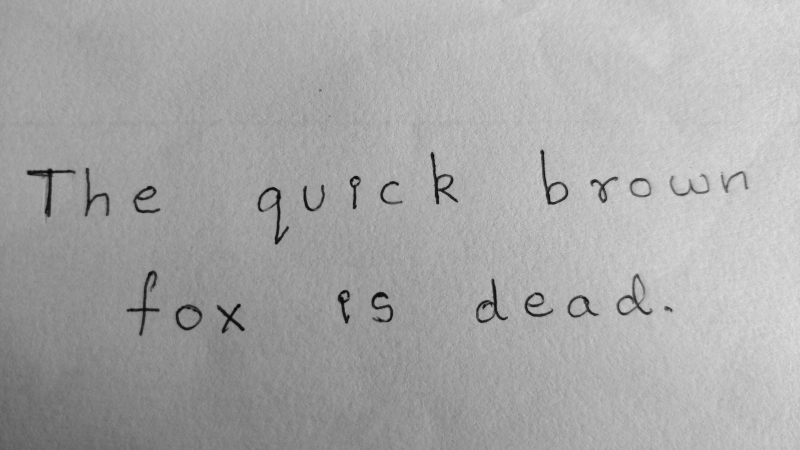

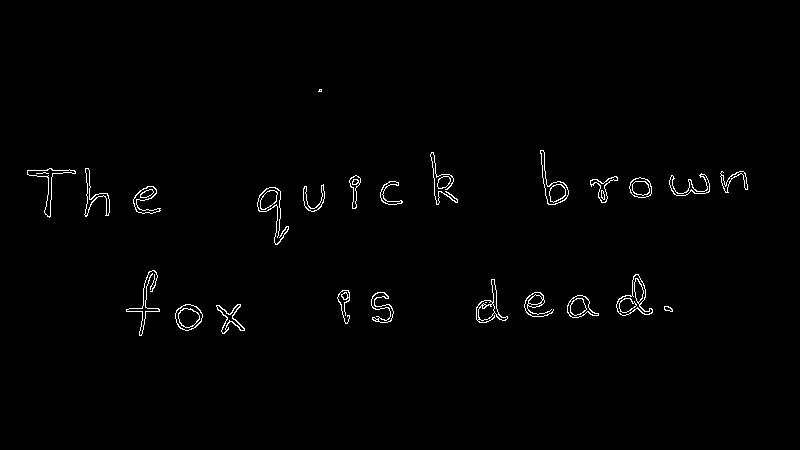

76 76


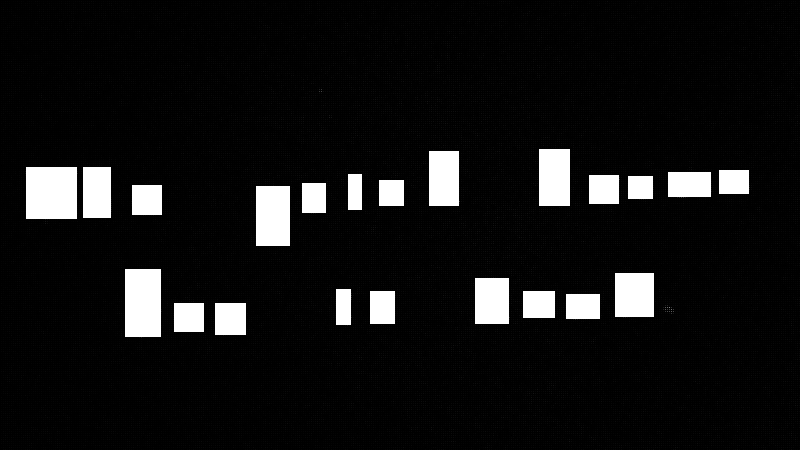

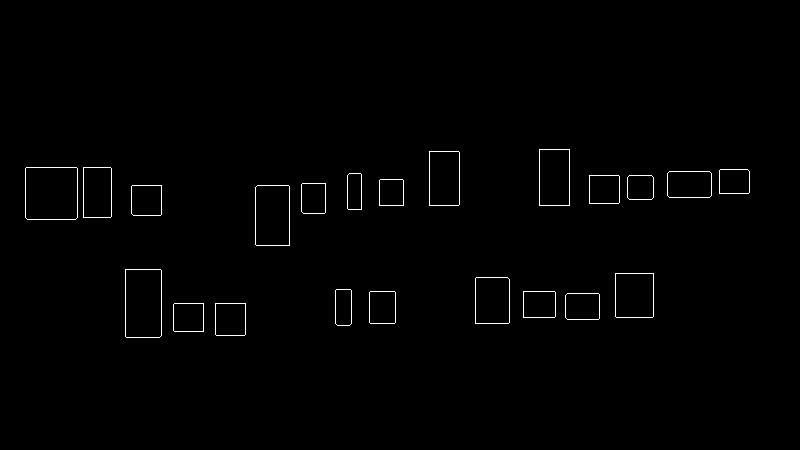

44 44


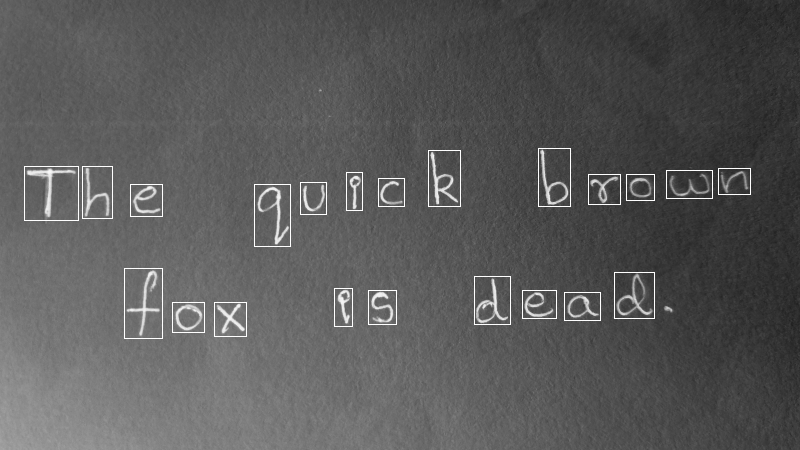

In [13]:
import skimage
import numpy as np
from skimage.feature import hog
import cv2
import imutils
from google.colab.patches import cv2_imshow

testimage=cv2.imread('/content/drive/My Drive/Colab Notebooks/betterhandwriting2.jpg')
testimage=imutils.resize(testimage, width=800)
featurevector, hogimage = hog(testimage, orientations=3, pixels_per_cell=(2,2), cells_per_block=(2,2), block_norm='L2-Hys', visualize=True, transform_sqrt=False, feature_vector=True, multichannel=None)
#print(featurevector)
hogimage=np.array(hogimage)
cv2_imshow(hogimage)
hog=hogimage.copy()
#cv2_imshow(testimage)
#cv2_imshow(hogimage)

gray = cv2.cvtColor(testimage, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

#thresh = cv2.threshold(gray, 118, 255, cv2.THRESH_BINARY_INV)[1]
#cv2_imshow(thresh)

canny=cv2.Canny(gray, 118, 255)
cv2_imshow(canny)

cnts, heirarchy = cv2.findContours(canny.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
heirarray=heirarchy[0]
print(len(heirarray), len(cnts))

i=0
#cv2_imshow(hogimage)

for counter in range(len(heirarray)):
	if heirarray[(counter,3)]==-1:	
		x,y,w,h = cv2.boundingRect(cnts[counter])
		#bound the images
		if w > 10 and h > 10:
			cv2.rectangle(hogimage,(x-1,y-1),(x+w,y+h),(255),-1)
	
cv2_imshow(hogimage)
hogimage=np.uint8(hogimage)

canny2=cv2.Canny(hogimage, 120,255)
cv2_imshow(canny2)

cnts2, heirarchy2 = cv2.findContours(canny2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
heirarray2=heirarchy2[0]
print(len(heirarray2), len(cnts2))

testimage=cv2.cvtColor(testimage,cv2.COLOR_BGR2GRAY)
testimage=cv2.bitwise_not(testimage)

j=0
#cv2_imshow(hogimage)

for counter2 in range(len(heirarray2)):
	if heirarray2[(counter2,3)]==-1:	
		x,y,w,h = cv2.boundingRect(cnts2[counter2])
		#bound the images
		if w > 10 and h > 10:
			cv2.rectangle(testimage,(x-1,y-1),(x+w,y+h),(255),1)
			# save individual images
			cv2.imwrite(str(i) + ".jpg", testimage[y:y + h, x:x + w])
			i = i + 1

cv2_imshow(testimage)

In [26]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/4.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
img=cv2.resize(img, (28,28))
cv2_imshow(img)
img=torch.from_numpy(img)
img=img.float()

"""
img=cv2.threshold(img,138, 255, cv2.THRESH_BINARY_INV)[1]
#cv2_imshow(img)
img=cv2.GaussianBlur(img, (11,11),0)
img=cv2.resize(img, (28,28))
img=cv2.flip(img,1)
img=cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2_imshow(img)
img=torch.from_numpy(img)
img=img.float()
"""

'\nimg=cv2.threshold(img,138, 255, cv2.THRESH_BINARY_INV)[1]\n#cv2_imshow(img)\nimg=cv2.GaussianBlur(img, (11,11),0)\nimg=cv2.resize(img, (28,28))\nimg=cv2.flip(img,1)\nimg=cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)\ncv2_imshow(img)\nimg=torch.from_numpy(img)\nimg=img.float()\n'

In [27]:
print(img.shape)
img=torch.reshape(img, (1,1,28,28))
resultoftest=MYNN2(img)
resultoftest=F.softmax(resultoftest, dim=1)
print(resultoftest.shape)
pred=torch.argmax(resultoftest, dim=1)
print(pred)
pred=np.array(pred)
print(numtoletter(pred[0]))

torch.Size([28, 28])
torch.Size([1, 62])
tensor([42])
G


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import numpy as np
import sklearn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
transform=transforms.Compose([transforms.RandomHorizontalFlip(p=1),transforms.RandomAffine((+90,+90)),transforms.ToTensor()])
trainset=datasets.EMNIST(root='/content/drive/My Drive/Colab Notebooks/data', split= 'byclass', train=True, download=True, transform=transform)
testset=datasets.EMNIST(root='/content/drive/My Drive/Colab Notebooks/data', split= 'byclass', train=False, download=True, transform=transform)
print(len(trainset))
print(len(testset))
print(len(trainset)+len(testset))
print(1)  

697932
116323
814255
1


In [3]:
batch=32
numberofbatches=697932/32
print(numberofbatches)
numberofbatches=21811
print(numberofbatches)
trainloadeddata=DataLoader(trainset, batch_size=batch, shuffle= True)
testloadeddata=DataLoader(testset, batch_size=batch, shuffle= True)
#for batchno,(image, labels) in enumerate(trainloadeddata):
    #if  batchno==1:
     #print(image, labels)

21810.375
21811


In [4]:
class ModelOfNet(nn.Module):
    def __init__(self):
        super(ModelOfNet,self).__init__()

        self.convolve=nn.Sequential(
                nn.Conv2d(1,8,3,1,1),
                nn.ReLU(),
                nn.Conv2d(8,16,3,1,1),
                nn.ReLU(),
                nn.BatchNorm2d(16),
                nn.MaxPool2d(2,2),
                nn.Conv2d(16,32,3,1,1),
                nn.ReLU(),
                nn.BatchNorm2d(32),
                nn.MaxPool2d(2,2),
        )
        self.fullyconnect=nn.Linear(1568,62)

    def forward(self, x):
        x=self.convolve(x)
        x=x.view(x.size(0),-1)
        x=self.fullyconnect(x)
        return x 
    print('I sure hope this model works fine this time without any errors')

I sure hope this model works fine this time without any errors


In [5]:
MYNN2=ModelOfNet()
print(MYNN2)
classwts=torch.load('/content/drive/My Drive/Colab Notebooks/lossweights.pt')
print(classwts)
print(classwts.dtype)
lossfunction=torch.nn.CrossEntropyLoss(weight=classwts)
updatefunction=torch.optim.Adam(MYNN2.parameters(), lr=0.000005)
print('completed running block')

ModelOfNet(
  (convolve): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fullyconnect): Linear(in_features=1568, out_features=62, bias=True)
)
tensor([0.3255, 0.2933, 0.3291, 0.3203, 0.3357, 0.3583, 0.3288, 0.3148, 0.3316,
        0.3326, 1.7570, 2.9028, 1.1152, 2.4676, 2.2815, 1.2260, 4.4724, 3.5714,
        0.9423, 2.9923, 4.5612, 2.2177, 1.2505, 1.3666, 0.4506, 1.3486, 4.3213,
        2.2190, 0.5421, 1.146

In [6]:
def validationtrainingtime(epochs):
  avglossoverepochs=[]
  accuracyoverepochs=[]
  validationaccuracyoverepochs=[]
  for i in range(epochs):
    sum=0.0
    avgaccuracyoverepoch=0.0
    sumbatch=0.0
    for batchno,(image, labels) in enumerate(trainloadeddata):

      updatefunction.zero_grad()
      resultofmodel=MYNN2(image)
      losscalc=lossfunction(resultofmodel, labels)
      resultofmodel=F.softmax(resultofmodel, dim=1)
      #print(resultofmodel.shape)
      pred=torch.argmax(resultofmodel, dim=1)
      #print(pred)
      
      count=0.0
      assert pred.shape[0]==labels.shape[0]
      for j in range(pred.shape[0]):
        if pred[j]==labels[j]:
          count=count+1.0
      
      batchaccuracy=(count/pred.shape[0])*100
      sum=sum+losscalc
      sumbatch=sumbatch+losscalc
      losscalc.backward()
      updatefunction.step()

      if batchno%1000==True:
        print(i, batchno, "Batch Loss:", losscalc,"Batch Accuracy=", batchaccuracy,"%", "Average Loss Over 1000 Batches:", (sumbatch/1000))
        sumbatch=0.0
      avgaccuracyoverepoch=avgaccuracyoverepoch+(batchaccuracy/numberofbatches)
      if batchno==17500:
        break

    print("Average Loss over Epoch:", (sum/numberofbatches))
    print("Average Accuracy over Epoch:", avgaccuracyoverepoch, "%")
    accuracyoverepochs.append(avgaccuracyoverepoch)
    avglossoverepochs.append((sum/numberofbatches))
    avgvalidationaccuracyoverepoch=0.0
    for batchno2,(image2,labels2) in enumerate(trainloadeddata):
      if batchno2>17500:  
        with torch.no_grad():
            resultofmodel2=MYNN2(image2)
            losscalc2=lossfunction(resultofmodel2, labels2)
            resultofmodel2=F.softmax(resultofmodel2, dim=1)
            #print(resultofmodel2.shape)
            pred2=torch.argmax(resultofmodel2, dim=1)
            #print(pred2)
            
            count2=0.0
            assert pred2.shape[0]==labels2.shape[0]
            for k in range(pred2.shape[0]):
              if pred2[k]==labels2[k]:
                count2=count2+1.0
            batchaccuracy2=(count2/pred2.shape[0])*100

            if batchno2%100==True:
              print(i, batchno2, "Batch Validation Accuracy=", batchaccuracy2, "%")
            avgvalidationaccuracyoverepoch=avgvalidationaccuracyoverepoch+(batchaccuracy2/(numberofbatches-17500))

    print("Average Validation Accuracy over Epoch=", avgvalidationaccuracyoverepoch)
    validationaccuracyoverepochs.append(avgvalidationaccuracyoverepoch)  
  print('hopefully i reach this part of the function')
  print(accuracyoverepochs)
  print(avglossoverepochs)
  print(validationaccuracyoverepochs) 

In [7]:
epoch=10
validationtrainingtime(epoch)

0 1 Batch Loss: tensor(4.6553, grad_fn=<NllLossBackward>) Batch Accuracy= 0.0 % Average Loss Over 1000 Batches: tensor(0.0088, grad_fn=<DivBackward0>)
0 1001 Batch Loss: tensor(3.3062, grad_fn=<NllLossBackward>) Batch Accuracy= 31.25 % Average Loss Over 1000 Batches: tensor(3.9970, grad_fn=<DivBackward0>)
0 2001 Batch Loss: tensor(2.7406, grad_fn=<NllLossBackward>) Batch Accuracy= 59.375 % Average Loss Over 1000 Batches: tensor(3.2637, grad_fn=<DivBackward0>)
0 3001 Batch Loss: tensor(3.0436, grad_fn=<NllLossBackward>) Batch Accuracy= 53.125 % Average Loss Over 1000 Batches: tensor(2.8128, grad_fn=<DivBackward0>)
0 4001 Batch Loss: tensor(2.0612, grad_fn=<NllLossBackward>) Batch Accuracy= 65.625 % Average Loss Over 1000 Batches: tensor(2.4831, grad_fn=<DivBackward0>)
0 5001 Batch Loss: tensor(2.2600, grad_fn=<NllLossBackward>) Batch Accuracy= 59.375 % Average Loss Over 1000 Batches: tensor(2.2306, grad_fn=<DivBackward0>)
0 6001 Batch Loss: tensor(2.0542, grad_fn=<NllLossBackward>) Batc

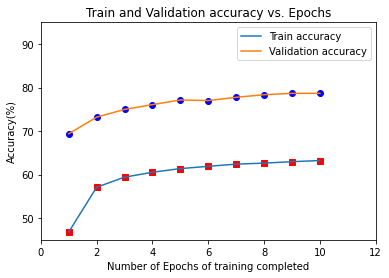

In [9]:
accuracyoverepochs=[46.77785864929801, 57.08630392919581, 59.400933015436145, 60.528517720400934, 61.36854683415085, 61.89766631514688, 62.397987254122135, 62.63367681443596, 62.96063339597731, 63.22755719589502]
validationaccuracyoverepochs=[69.37606317173055, 73.20517281373235, 74.97946145519224, 76.08226049640497, 77.14953993659721, 77.02220095878812, 77.76642117064969, 78.36276385989446, 78.67060040207312, 78.68558145828591]

plt.plot([1,2,3,4,5,6,7,8,9,10],accuracyoverepochs,'rs')
plt.plot([1,2,3,4,5,6,7,8,9,10],validationaccuracyoverepochs,'bo')
plt.plot([1,2,3,4,5,6,7,8,9,10],accuracyoverepochs,label='Train accuracy')
plt.plot([1,2,3,4,5,6,7,8,9,10],validationaccuracyoverepochs,label='Validation accuracy')
plt.axis([0,12,45,95])
plt.xlabel('Number of Epochs of training completed')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.title('Train and Validation accuracy vs. Epochs')
plt.show()

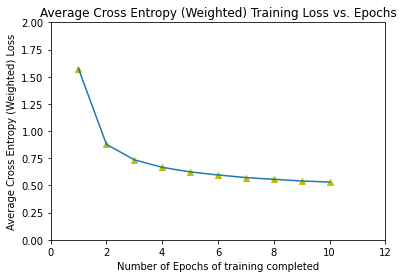

In [12]:
avglossoverepochs=[1.5746,0.8786,0.7356,0.6666,0.6246,0.5965,0.5723,0.5564,0.5409,0.5310]

plt.plot([1,2,3,4,5,6,7,8,9,10], avglossoverepochs, 'y^')
plt.plot([1,2,3,4,5,6,7,8,9,10], avglossoverepochs)
plt.xlabel('Number of Epochs of training completed')
plt.ylabel('Average Cross Entropy (Weighted) Loss')
plt.axis([0,12,0,2])
plt.title('Average Cross Entropy (Weighted) Training Loss vs. Epochs')
plt.show()

In [16]:
def numtoletter(n):
    switcher={
        0:'0',
        1:'1',
        2:'2',
        3:'3',
        4:'4',
        5:'5',
        6:'6',
        7:'7',
        8:'8',
        9:'9',
        10:'a',
        11:'b',
        12:'c',
        13:'d',
        14:'e',
        15:'f',
        16:'g',
        17:'h',
        18:'i',
        19:'j',
        20:'k',
        21:'l',
        22:'m',
        23:'n',
        24:'o',
        25:'p',
        26:'q',
        27:'r',
        28:'s',
        29:'t',
        30:'u',
        31:'v',
        32:'w',
        33:'x',
        34:'y',
        35:'z',
        36:'A',
        37:'B',
        38:'C',
        39:'D',
        40:'E',
        41:'F',
        42:'G',
        43:'H',
        44:'I',
        45:'J',
        46:'K',
        47:'L',
        48:'M',
        49:'N',
        50:'O',
        51:'P',
        52:'Q',
        53:'R',
        54:'S',
        55:'T',
        56:'U',
        57:'V',
        58:'W',
        59:'X',
        60:'Y',
        61:'Z',     
    }
    return switcher.get(n)